1) This step installs TensorFlow, TensorFlow Datasets, and plotting libraries for working with Oxford Flowers 102 dataset.

In [ ]:
!pip install tensorflow --quiet
!pip install tensorflow-datasets --quiet
!pip install matplotlib numpy --quiet


2) Now, importing TensorFlow, TensorFlow Datasets, matplotlib for plotting, and numpy for array operations.

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


3) I’m using a custom path to avoid permission issues and TFDS widget errors. After loading, I print a confirmation message.

In [18]:
data_dir = 'C:/Users/Mitali Gaware/tfds_data'

dataset, info = tfds.load(
    'oxford_flowers102',
    split=['train', 'validation', 'test'],
    with_info=True,
    as_supervised=True,
    data_dir=data_dir
)

train_ds, val_ds, test_ds = dataset
print(" Dataset loaded successfully!")
print("Train size:", info.splits['train'].num_examples)
print("Validation size:", info.splits['validation'].num_examples)
print("Test size:", info.splits['test'].num_examples)


 Dataset loaded successfully!
Train size: 1020
Validation size: 1020
Test size: 6149


4) This cell prints key info about the Oxford Flowers 102 dataset:
- Total classes and sample class labels
- Description and its length
- Default image resolution from metadata
It also checks actual image shapes from 100 samples to verify if all images have consistent resolutions.


In [21]:
print("Dataset Name:", info.name)
print("Number of Classes:", info.features['label'].num_classes)
print("Class Labels (sample):", info.features['label'].names[:10], "...")
print("Description Length:", len(info.description), "characters")
print("Description Preview:", info.description[:300], "...")
print("Image Shape (default from info):", info.features['image'].shape)

shapes = []
for img, _ in train_ds.take(100): 
    shapes.append(img.shape)

unique_shapes = set(shapes)
print("Sample Unique Image Resolutions (from 100 samples):", unique_shapes)


Dataset Name: oxford_flowers102
Number of Classes: 102
Class Labels (sample): ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle'] ...
Description Length: 757 characters
Description Preview: The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
occurring in the United Kingdom. Each class consists of between 40 and 258
images. The images have large scale, pose and light variations. In addition,
there are categories that have large variations within the category ...
Image Shape (default from info): (None, None, 3)
Sample Unique Image Resolutions (from 100 samples): {TensorShape([545, 501, 3]), TensorShape([552, 500, 3]), TensorShape([750, 500, 3]), TensorShape([597, 500, 3]), TensorShape([587, 500, 3]), TensorShape([547, 500, 3]), TensorShape([500, 500, 3]), TensorShape([671, 500, 3]), TensorShape([500, 667, 3]), TensorShape([500, 700, 3

5) Displays 9 sample images from the training set, each with a simple text label using its class name as a description.

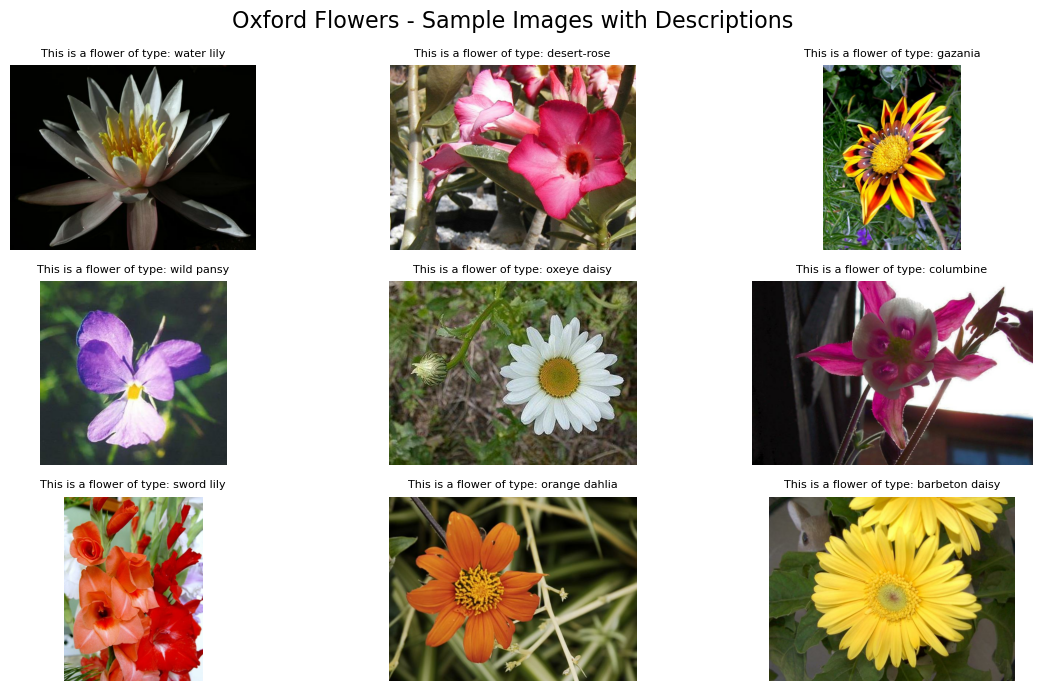

In [29]:
def show_flower_samples_with_descriptions(dataset, class_names, title, n=9):
    plt.figure(figsize=(12, 7))
    for i, (image, label) in enumerate(dataset.take(n)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        
        label_name = class_names[label.numpy()]
        description = f"This is a flower of type: {label_name}"
        
        plt.title(description, fontsize=8)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

show_flower_samples_with_descriptions(train_ds, info.features['label'].names, "Oxford Flowers - Sample Images with Descriptions")
